In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import timeit
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [10]:
def accuracy_reg(result, test_y): 
    diff = np.asarray(result)-np.asarray(test_y)
    rmse = (np.mean(diff**2))**0.5
    return rmse

In [11]:
def optimalk(trainx,validatex,trainy,validatey): 
    minacc = 1000
    for i in range(1,10):
        neigh = KNeighborsRegressor(n_neighbors=i)
        neigh.fit(trainx,trainy)
        result = neigh.predict(validatex)
        acc = accuracy_reg(result,validatey)
        if(acc<minacc): 
            minacc = acc
            K = i
    return K,minacc

In [12]:
def train_error(trainx,trainy,k):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainx,trainy)
    result = neigh.predict(trainx)
    acc = accuracy_reg(result,trainy)
    return acc

In [13]:
def test_error(trainx,trainy,testx,testy,k):
    #test error using k nearest neighboours
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(trainx,trainy)
    result = neigh.predict(test_x)
    acc = accuracy_reg(result,testy)
    return acc

In [14]:

def cross_validate(train_x,train_y,test_x,test_y):
    trainx = train_x[:240]
    validatex = train_x[240:]
    trainy = train_y[:240]
    validatey = train_y[240:]
    K,validate_err = optimalk(trainx,validatex,trainy,validatey)
    test_err = test_error(trainx,trainy,test_x,test_y,K)
    train_err = train_error(trainx,trainy,K)
    print("Fold 1: optimal K is",K,"Train RMSE",train_err," Validation RMSE is",validate_err,"Test RMSE is",test_err) 

    #Fold 2
    trainx = train_x[60:]
    trainy = train_y[60:]
    validatex = train_x[:60]
    validatey = train_y[:60]
    K,validate_err = optimalk(trainx,validatex,trainy,validatey)
    test_err = test_error(trainx,trainy,test_x,test_y,K)
    train_err = train_error(trainx,trainy,K)
    print("Fold 2: optimal K is",K,"Train RMSE",train_err," Validation RMSE is",validate_err,"Test RMSE is",test_err)  

    #Fold 3
    trainx = train_x[120:] + train_x[:60]
    trainy = train_y[120:] + train_y[:60]
    validatex = train_x[60:120]
    validatey = train_y[60:120]
    K,validate_err = optimalk(trainx,validatex,trainy,validatey)
    test_err = test_error(trainx,trainy,test_x,test_y,K)
    train_err = train_error(trainx,trainy,K)
    print("Fold 3: optimal K is",K,"Train RMSE",train_err," Validation RMSE is",validate_err,"Test RMSE is",test_err) 

    #Fold 4
    trainx = train_x[180:] + train_x[:120]
    trainy = train_y[180:] + train_y[:120]
    validatex = train_x[120:180]
    validatey = train_y[120:180]
    K,validate_err = optimalk(trainx,validatex,trainy,validatey)
    test_err = test_error(trainx,trainy,test_x,test_y,K)
    train_err = train_error(trainx,trainy,K)
    print("Fold 4: optimal K is",K,"Train RMSE",train_err," Validation RMSE is",validate_err,"Test RMSE is",test_err) 

    #Fold 5
    trainx = train_x[240:] + train_x[:180]
    trainy = train_y[240:] + train_y[:180]
    validatex = train_x[180:240]
    validatey = train_y[180:240]
    K,validate_err = optimalk(trainx,validatex,trainy,validatey)
    test_err = test_error(trainx,trainy,test_x,test_y,K)
    train_err = train_error(trainx,trainy,K)
    print("Fold 5: optimal K is",K,"Train RMSE",train_err," Validation RMSE is",validate_err,"Test RMSE is",test_err) 


In [15]:

reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
X,Y = reg[features[1:-1]].values.tolist(), reg[features[-1]].values.tolist()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
#Q2 Showing usage on dataset.
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(train_x,train_y)
result = neigh.predict(test_x)
accuracy_reg(result,test_y)

7.700172210290269

In [9]:
#Q2(a) 5 fold cross validation on dataset. 

reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
X,Y = reg[features[1:-1]].values.tolist(), reg[features[-1]].values.tolist()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.275, random_state=42)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.275, random_state=42)
cross_validate(train_x,train_y,test_x,test_y) 

Fold 1: optimal K is 2 Train RMSE 4.600409854929595  Validation RMSE is 11.091026778436703 Test RMSE is 7.468010726460315
Fold 2: optimal K is 5 Train RMSE 7.3777523677607935  Validation RMSE is 6.768279939049015 Test RMSE is 8.04437124776883
Fold 3: optimal K is 3 Train RMSE 6.31189390196236  Validation RMSE is 7.048297666812887 Test RMSE is 7.489353717331945
Fold 4: optimal K is 9 Train RMSE 8.039121326850275  Validation RMSE is 7.798393709248362 Test RMSE is 7.877602158513376
Fold 5: optimal K is 4 Train RMSE 7.009578268341112  Validation RMSE is 7.819879847755548 Test RMSE is 7.907503237820416


In [10]:
#Q2(b) Now scaling the features between 0 and 1
reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
scaler = MinMaxScaler()
scaler.fit(reg)
reg = scaler.transform(reg)
X,Y = reg[:,1:-1],reg[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.275, random_state=42)
train_x, test_x, train_y, test_y = train_x.tolist(), test_x.tolist(),train_y.tolist(),test_y.tolist() 
cross_validate(train_x,train_y,test_x,test_y) 

Fold 1: optimal K is 7 Train RMSE 0.06138417727487144  Validation RMSE is 0.10713887797606848 Test RMSE is 0.06914422484975027
Fold 2: optimal K is 3 Train RMSE 0.06835085805074098  Validation RMSE is 0.06350181071651953 Test RMSE is 0.0686091358125672
Fold 3: optimal K is 9 Train RMSE 0.073706851675385  Validation RMSE is 0.07870893249580158 Test RMSE is 0.06897647253459445
Fold 4: optimal K is 7 Train RMSE 0.07193501863354858  Validation RMSE is 0.06626292675032029 Test RMSE is 0.070360185164435
Fold 5: optimal K is 8 Train RMSE 0.07175543587188596  Validation RMSE is 0.07519486929550498 Test RMSE is 0.07170773544757468


c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0.5, 1.0, 'Test Error v/s K')

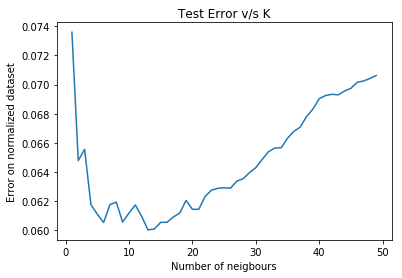

In [11]:
#Q2(c) Plotting test error as a function of K 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
acc_list = [] 
k = range(1,50) 
for i in k :
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(train_x,train_y)
    result = neigh.predict(test_x)
    acc = accuracy_reg(result,test_y)
    acc_list.append(acc)
plt.plot(k, acc_list)
plt.xlabel('Number of neigbours')
plt.ylabel('Error on normalized dataset')
plt.title('Test Error v/s K')

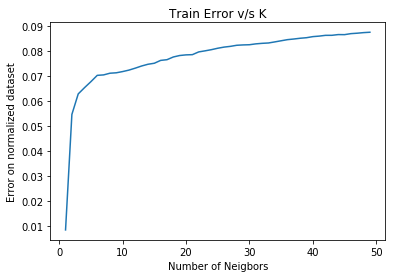

In [12]:
#Q2(c) Plotting train error as a function of K
acc_list = []
k = range(1,50)
acc_list = []
for i in k: 
    neigh = KNeighborsRegressor(n_neighbors=i) 
    neigh.fit(train_x,train_y)
    result = neigh.predict(train_x)
    acc = accuracy_reg(result,train_y)
    acc_list.append(acc) 
#Plotting test error curve.
plt.plot(k,acc_list)
plt.xlabel('Number of Neigbors')
plt.ylabel('Error on normalized dataset')
plt.title('Train Error v/s K')
acc_list = []


In [13]:
#Q2(c) (i) Let's use a value of K = 9
reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
X,Y = reg[features[1:-1]].values.tolist(), reg[features[-1]].values.tolist()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.275, random_state=42)

neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(train_x,train_y)
result = neigh.predict(test_x)
loc = np.argmax(np.abs(result-test_y))
error = (np.abs(result-test_y))[loc]
home = test_x[loc]
print("the home which shows max error is", loc)
print("the error is",error)
print("feature values are",home)

#After normalizing. 


reg = pd.read_excel('real_estate.xlsx')
features = reg.columns
scaler = MinMaxScaler()
scaler.fit(reg)
reg = scaler.transform(reg)
X,Y = reg[:,1:-1],reg[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.275, random_state=42)


neigh = KNeighborsRegressor(n_neighbors=9)
neigh.fit(train_x,train_y)
result = neigh.predict(test_x)
error = (np.abs(result-test_y))[loc]
home = test_x[loc]

print
print("the new error is",error)
print("feature values are",home)


the home which shows max error is 102
the error is 32.588888888888896
feature values are [2013.3333333, 14.8, 393.2606, 6.0, 24.96172, 121.53812]
the new error is 0.2984531392174704
feature values are [0.72727271 0.33789954 0.05721554 0.6        0.35930683 0.69646323]


c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
